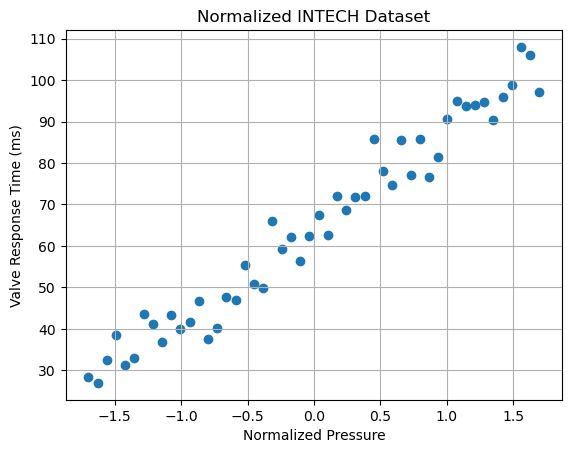

INTECH Design Matrix (first 5 rows):
 [-1.69774938 -1.62845348 -1.55915759 -1.4898617  -1.4205658 ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Simulated INTECH dataset: Pressure (psi) vs Valve Response Time (ms)
np.random.seed(42)
X_intech = np.linspace(20, 120, 50).reshape(-1, 1)  # Pressure in psi
y_intech = 0.8 * X_intech.flatten() + 10 + np.random.normal(0, 5, 50)  # Response time in ms

# Normalize the feature
scaler = StandardScaler()
X_intech_normalized = scaler.fit_transform(X_intech).flatten()  # Convert to 1D array

# Visualize
plt.scatter(X_intech_normalized, y_intech)
plt.xlabel("Normalized Pressure")
plt.ylabel("Valve Response Time (ms)")
plt.title("Normalized INTECH Dataset")
plt.grid(True)
plt.show()

print("INTECH Design Matrix (first 5 rows):\n", X_intech_normalized[:5])


In [5]:
# Linear model: y_pred = w*X + b
def predict(X, w, b):
    return w * X + b

# Cost functions
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Try different parameter pairs
params = [(1.5, 0.5), (0.7, 12), (0.9, 8)]
for w, b in params:
    y_pred = predict(X_intech_normalized, w, b)
    mse = compute_mse(y_intech, y_pred)
    mae = compute_mae(y_intech, y_pred)
    print(f"w={w}, b={b} => MSE: {mse:.2f}, MAE: {mae:.2f}")


w=1.5, b=0.5 => MSE: 4614.19, MAE: 64.37
w=0.7, b=12 => MSE: 3300.44, MAE: 52.87
w=0.9, b=8 => MSE: 3730.66, MAE: 56.87


Optimized w: 19.6954, b: 56.2693, Final MSE: 107.1409


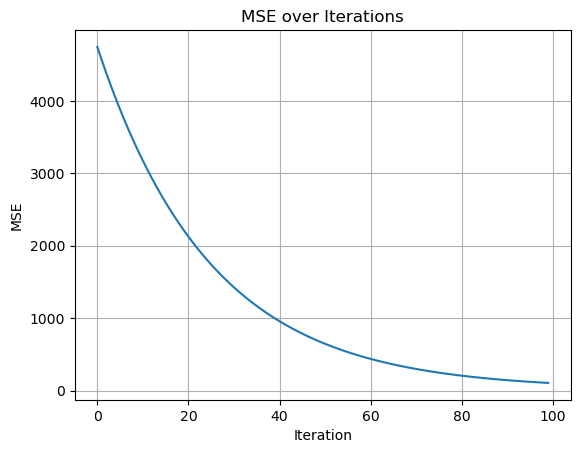

C:\Users\starb\.conda\envs\ai_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


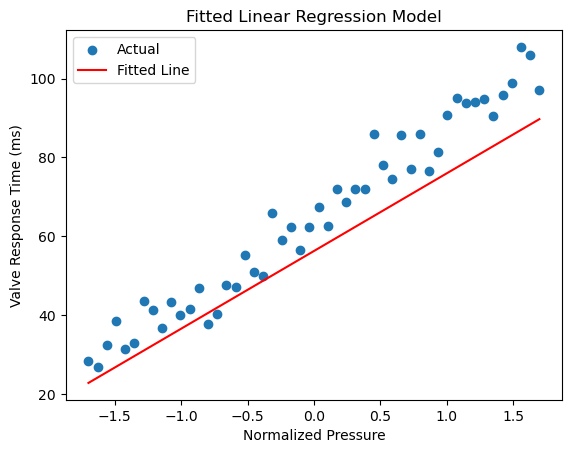

In [6]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, lr=0.01, n_iter=100):
    m = len(y)
    w, b = 0.0, 0.0
    mse_history = []

    for i in range(n_iter):
        y_pred = w * X + b
        error = y_pred - y
        dw = (2/m) * np.sum(error * X)
        db = (2/m) * np.sum(error)
        
        w -= lr * dw
        b -= lr * db

        mse = compute_mse(y, y_pred)
        mse_history.append(mse)
        
    return w, b, mse_history

# Train
w_opt, b_opt, mse_hist = gradient_descent(X_intech_normalized.flatten(), y_intech)
print(f"Optimized w: {w_opt:.4f}, b: {b_opt:.4f}, Final MSE: {mse_hist[-1]:.4f}")

# Plot MSE history
plt.plot(mse_hist)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations")
plt.grid(True)
plt.show()

# Plot fitted line
y_pred = predict(X_intech_normalized, w_opt, b_opt)
plt.scatter(X_intech_normalized, y_intech, label="Actual")
plt.plot(X_intech_normalized, y_pred, color="red", label="Fitted Line")
plt.xlabel("Normalized Pressure")
plt.ylabel("Valve Response Time (ms)")
plt.legend()
plt.title("Fitted Linear Regression Model")
plt.show()


In [7]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_intech_normalized, y_intech, test_size=0.2, random_state=42)

# Retrain gradient descent on training data
w_final, b_final, _ = gradient_descent(X_train.flatten(), y_train, lr=0.01, n_iter=100)

# Evaluate on test set
y_test_pred = predict(X_test, w_final, b_final)
mse_test = compute_mse(y_test, y_test_pred)
mae_test = compute_mae(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.4f}, Test MAE: {mae_test:.4f}")


Test MSE: 136.2048, Test MAE: 10.2092
